In [1]:
import matplotlib.pyplot as plt
import sympy
import cirq

In [2]:
# Get a qubit and a circuit
qbit = cirq.LineQubit(0)
circ = cirq.Circuit()

In [3]:
# Get a symbol
symbol = sympy.Symbol("t")

In [4]:
# Add a parameterized gate
circ.append(cirq.XPowGate(exponent=symbol)(qbit))

In [5]:
# Measure 
circ.append(cirq.measure(qbit, key="z"))

In [6]:
# Display the circuit
print("Circuit:")
print(circ)

Circuit:
0: ───X^t───M('z')───


In [7]:
# Get a sweep over parameter values
sweep = cirq.Linspace(key=symbol.name, start=0.0, stop=2.0, length=100)

In [8]:
# Execute the circuit for all values in the sweep
sim = cirq.Simulator()
res = sim.run_sweep(circ, sweep, repetitions=1000)

In [9]:
# Plot the measurement outcomes at each value in the sweep
angles = [x[0][1] for x in sweep.param_tuples()]
zeroes = [res[i].histogram(key="z")[0]/1000 for i in range(len(res))]

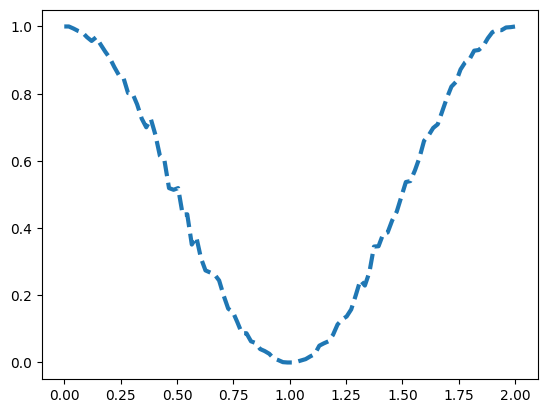

In [10]:
plt.plot(angles, zeroes, "--", linewidth=3)

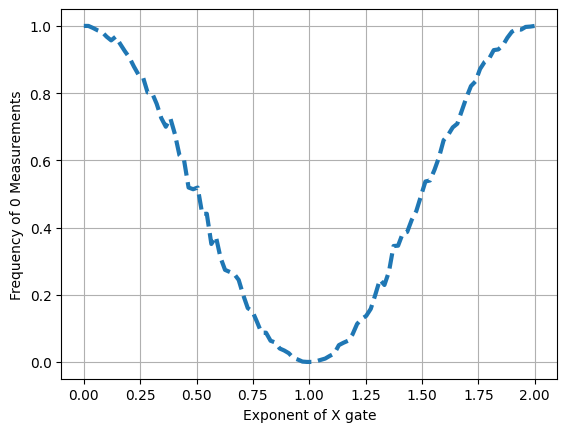

In [11]:
# Plot options and formatting
plt.ylabel("Frequency of 0 Measurements")
plt.xlabel("Exponent of X gate")
plt.grid()
plt.plot(angles, zeroes, "--", linewidth=3)
plt.savefig("param-sweep-cirq.pdf", format="pdf")

In [12]:
%%latex
\begin{equation}
R_X(t) = \exp^{i\pi t (s+\frac{1}{2})}
\begin{pmatrix}
\cos(\frac{\pi t}{2}) & -i\sin(\frac{\pi t}{2}) \\
-i\sin(\frac{\pi t}{2}) & \cos(\frac{\pi t}{2}) 
\end{pmatrix}
\end{equation}

<IPython.core.display.Latex object>

In [13]:
%%latex
\begin{equation}
R_X(t) *
\begin{pmatrix}
1 \\
0
\end{pmatrix}
=
\begin{pmatrix}
\cos(\frac{\pi t}{2}) \\
-i\sin(\frac{\pi t}{2})
\end{pmatrix}
\end{equation}

<IPython.core.display.Latex object>